In [5]:
# 배치 정규화, 이미지 확대, DCGAN
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Reshape, Input, Flatten, Dropout, UpSampling2D, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, _),(X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float64') / 255

In [7]:
# 생성자 모델
autoencoder = Sequential()

# 인코딩
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides= 2, padding='same', activation='relu'))

# 디코딩
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 8)          

In [8]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 53s 110ms/step - loss: 0.2116 - val_loss: 0.1438
Epoch 2/50
469/469 [==============================] - 52s 111ms/step - loss: 0.1338 - val_loss: 0.1239
Epoch 3/50
469/469 [==============================] - 51s 110ms/step - loss: 0.1195 - val_loss: 0.1141
Epoch 4/50
469/469 [==============================] - 51s 108ms/step - loss: 0.1116 - val_loss: 0.1074
Epoch 5/50
469/469 [==============================] - 51s 108ms/step - loss: 0.1066 - val_loss: 0.1035
Epoch 6/50
469/469 [==============================] - 50s 107ms/step - loss: 0.1033 - val_loss: 0.1006
Epoch 7/50
469/469 [==============================] - 51s 108ms/step - loss: 0.1008 - val_loss: 0.0984
Epoch 8/50
469/469 [==============================] - 51s 109ms/step - loss: 0.0988 - val_loss: 0.0966
Epoch 9/50
469/469 [==============================] - 51s 109ms/step - loss: 0.0973 - val_loss: 0.0954
Epoch 10/50
469/469 [==============================] - 51s 108ms/step - l

In [10]:
random_test = np.random.randint(X_test.shape[0], size=5)  # test index를 입의로 5개 선정
ae_imgs = autoencoder.predict(X_test) # 오토인덱스로 이미지 특성을 살려 새로운 이미지 생성

313/313 [==============================] - 4s 14ms/step


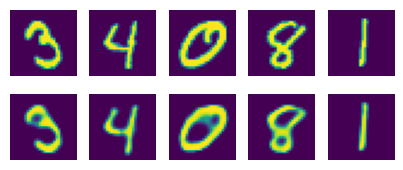

In [11]:
plt.figure(figsize=(7, 2))
for i, image_idx in enumerate(random_test):
    ax = plt.subplot(2, 7, i+1)
    plt.imshow(X_test[image_idx].reshape(28, 28))
    plt.axis('off')
    
    ax = plt.subplot(2, 7, 7+i+1)
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    plt.axis('off')
plt.show()